In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bmw_df = pd.read_csv('data/bmw.csv')

In [3]:
bmw_df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [4]:
bmw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


In [5]:
bmw_df.describe(include='all')

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
count,10781,10781.000000,10781.000000,10781,10781.000000,10781,10781.000000,10781.000000,10781.000000
unique,24,NaN,NaN,3,NaN,5,NaN,NaN,NaN
top,3 Series,NaN,NaN,Semi-Auto,NaN,Diesel,NaN,NaN,NaN
freq,2443,NaN,NaN,4666,NaN,7027,NaN,NaN,NaN
mean,NaN,2017.078935,22733.408867,NaN,25496.986550,NaN,131.702068,56.399035,2.167767
std,NaN,2.349038,11415.528189,NaN,25143.192559,NaN,61.510755,31.336958,0.552054
min,NaN,1996.000000,1200.000000,NaN,1.000000,NaN,0.000000,5.500000,0.000000
25%,NaN,2016.000000,14950.000000,NaN,5529.000000,NaN,135.000000,45.600000,2.000000
50%,NaN,2017.000000,20462.000000,NaN,18347.000000,NaN,145.000000,53.300000,2.000000
75%,NaN,2019.000000,27940.000000,NaN,38206.000000,NaN,145.000000,62.800000,2.000000


## EDA

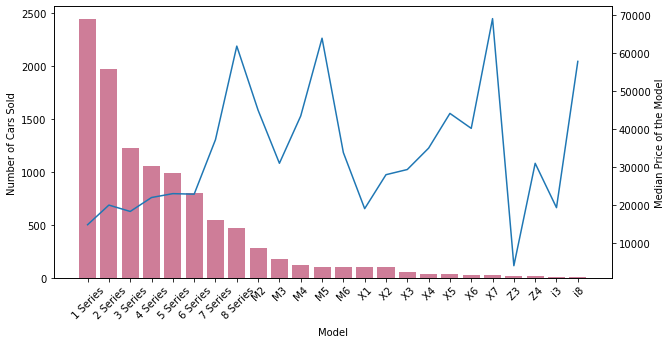

In [6]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='model',data=bmw_df,order=bmw_df.model.value_counts().index,color='palevioletred')
ax.tick_params(axis='x', rotation=45)
ax.set_xlabel('Model')
ax2 = ax.twinx()
sns.lineplot(x='model',y='price',data=bmw_df.groupby('model')['price'].median().reset_index(),ax=ax2)
ax.set_ylabel('Number of Cars Sold')
ax2.set_ylabel('Median Price of the Model')
plt.show()

There are 24 unique models, off which 1 series is the widely sold, evidently given its median price being around 500. Followed by 2 Series, whose price range is around the same level. So clearly, the price is a prime factor in deciding the purchase as a result the model whose prices are on the lower side, end up getting sold more. And model X7 has the highest median price, and also we can see that there are not many cars of this model that are sold!

In [7]:
bmw_df.year.value_counts().sort_index()

1996       1
1997       1
1998       1
1999       4
2000       2
2001       3
2002       6
2003       2
2004      12
2005       6
2006      14
2007      16
2008      23
2009      30
2010      41
2011      51
2012     119
2013     357
2014     501
2015     922
2016    1882
2017    1721
2018     848
2019    3485
2020     733
Name: year, dtype: int64

In [8]:
bmw_df.groupby('year')['model'].agg(lambda x:[x.value_counts().index[0],x.value_counts()[0]])

year
1996      [ 5 Series, 1]
1997            [ Z3, 1]
1998            [ Z3, 1]
1999            [ Z3, 3]
2000      [ 3 Series, 1]
2001      [ 3 Series, 1]
2002      [ 3 Series, 3]
2003      [ 5 Series, 1]
2004            [ M3, 4]
2005      [ 3 Series, 3]
2006      [ 3 Series, 5]
2007     [ 3 Series, 10]
2008      [ 3 Series, 8]
2009     [ 3 Series, 16]
2010     [ 3 Series, 14]
2011     [ 3 Series, 24]
2012     [ 3 Series, 39]
2013    [ 3 Series, 122]
2014    [ 3 Series, 138]
2015    [ 3 Series, 251]
2016    [ 1 Series, 434]
2017    [ 1 Series, 414]
2018    [ 3 Series, 212]
2019    [ 3 Series, 658]
2020    [ 3 Series, 152]
Name: model, dtype: object

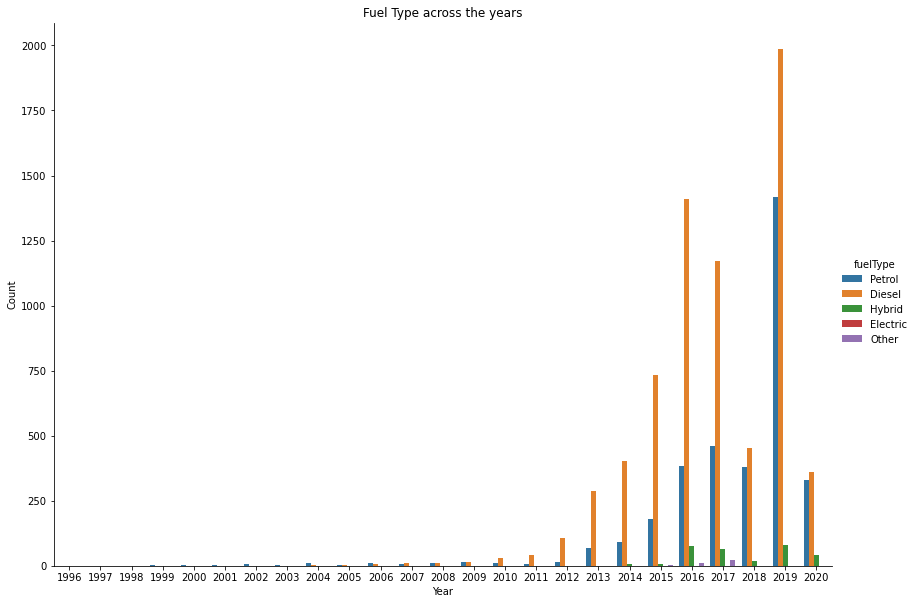

In [9]:
sns.catplot(kind="bar",data=bmw_df.groupby(['year','fuelType'])['model'].count().reset_index(),x='year',y='model',hue='fuelType',height=8.27, aspect=11.7/8.2)
plt.ylabel('Count')
plt.xlabel('Year')
plt.title('Fuel Type across the years')
plt.show()

In [10]:
bmw_df[bmw_df.fuelType=='Electric']

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
8375,i3,2017,18999,Automatic,20321,Electric,135,470.8,0.0
8400,i3,2016,18999,Automatic,9990,Electric,0,470.8,0.0
8835,i3,2015,17400,Automatic,29465,Electric,0,470.8,1.0


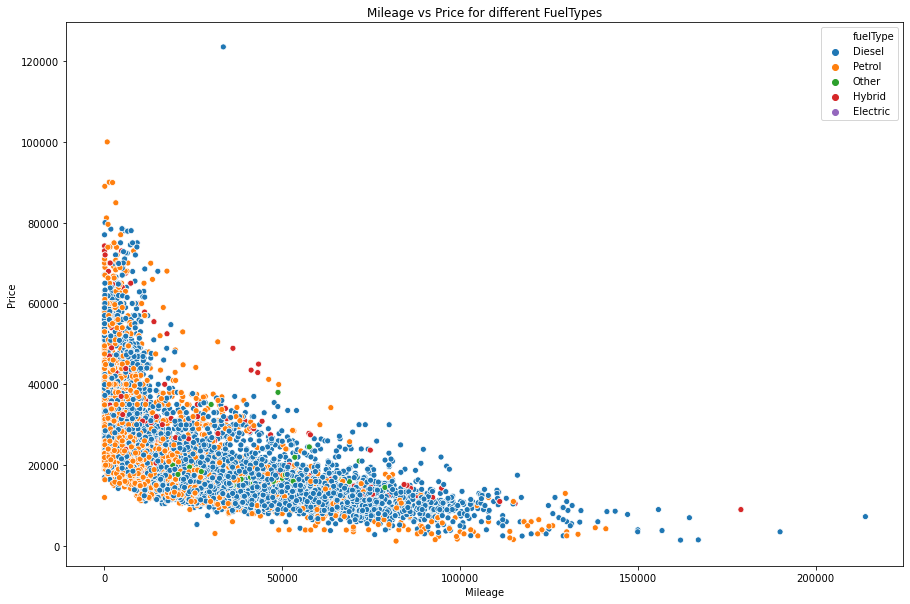

In [11]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=bmw_df,x='mileage',y='price',hue='fuelType')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Mileage vs Price for different FuelTypes')
plt.show()

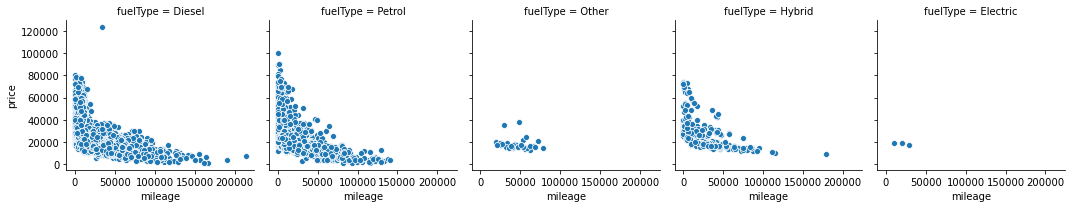

In [12]:
g = sns.FacetGrid(bmw_df, col="fuelType")
g.map(sns.scatterplot,'mileage','price')
plt.show()

Building Model for Price Prediction

Pre-Processing

In [13]:
bmw_df = bmw_df.astype({'model':'category','year':'category','transmission':'category','fuelType':'category'})
bmw_df.dtypes

model           category
year            category
price              int64
transmission    category
mileage            int64
fuelType        category
tax                int64
mpg              float64
engineSize       float64
dtype: object

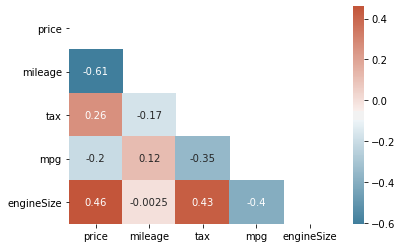

In [14]:
corr = bmw_df.select_dtypes('number').corr()
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr,annot=True,mask=np.triu(np.ones_like(corr, dtype=bool)),cmap=cmap)
plt.yticks(rotation=0)
plt.show()

price and mileage show huge negative correlation, and so does MPG. Engine size and price have fairly positive correlation

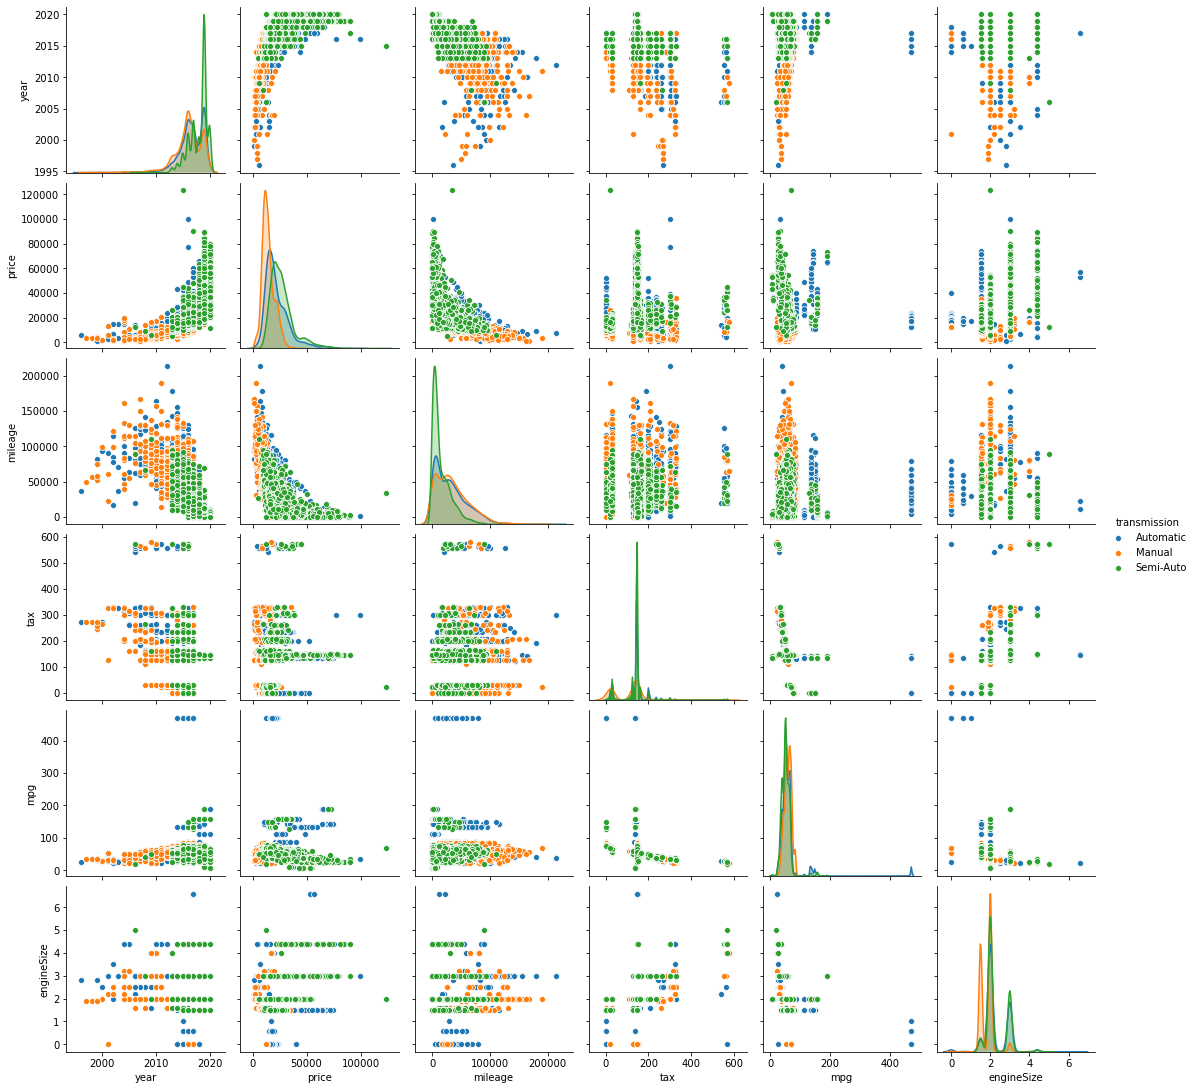

In [18]:
sns.pairplot(bmw_df,hue='transmission')
plt.show()